# 1. Connect to Snowflake

In [54]:
import decimal

import snowflake.connector
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ctx = snowflake.connector.connect(
    user='kristianaars',
    account='avsdods-gh85649',
    password=input('Please enter password:')
)

## 1.1 Check version

In [3]:
with ctx.cursor() as cs:
    cs.execute('SELECT current_version()')
    print(cs.fetchone()[0])

7.30.0


# 2 Pulling data

## 2.1 Selecting Database

In [4]:
with ctx.cursor() as cs:
    cs.execute('USE DATABASE my_sf_db')
    print(cs.fetchone()[0])

Statement executed successfully.


## 2.2 Fetch Data
Notice that we are collecting the data as a Pandas Dataframe by using `cs.fetch_pandas_all()`

In [5]:
with ctx.cursor() as cs:
    cs.execute('SELECT * FROM users')
    data = cs.fetch_pandas_all()

In [7]:
data

,ID,FIRST_NAME,SURNAME,EMAIL,BORN_YEAR
0,1,Kristian,Aars,kristian.aars@me.com,1998
1,2,Kristian,Aars,kristian.aars@me.com,1998
2,3,Barack,Obama,barack.obama@yahoo.com,1961
3,4,<YOUR_FIRSTNAME>,<YOUR_SURNAME>,<YOUR_EMAIL>,1998
4,5,Barack,Obama,barack.obama@yahoo.com,1961
5,6,Milan,Newar,milan.newar@gmail.com,1968


# 3 Processing Data
Lets look at how the temperature correlates with the number of bike rides. First we must collect the data

In [48]:
sql = """
SELECT
    TO_DATE(citibike_data.started_at) as ride_date,
    COUNT(ride_date) as n_trips,
    AVG(weather_data.avg_temperature_feelslike_2m_f) as temperature
FROM CITIBIKE.PUBLIC.RIDES citibike_data
INNER JOIN WEATHER_DATA.STANDARD_TILE.HISTORY_DAY weather_data
ON weather_data.date_valid_std = ride_date
WHERE weather_data.postal_code LIKE '10257'
GROUP BY ride_date
"""

with ctx.cursor() as cs:
    cs.execute(sql)
    data = cs.fetch_pandas_all()

In [62]:
data = data.drop(['RIDE_DATE'], axis=1)
data = data.astype(float)
data

,N_TRIPS,TEMPERATURE
0,91182.0,81.5
1,126713.0,81.5
2,100583.0,84.2
3,128947.0,85.0
4,120041.0,84.3
...,...,...
87,120422.0,76.8
88,111806.0,72.2
89,106569.0,59.4
90,114492.0,73.1


In [50]:
data.corr()

,N_TRIPS,TEMPERATURE
N_TRIPS,1.000000,0.532893
TEMPERATURE,0.532893,1.000000


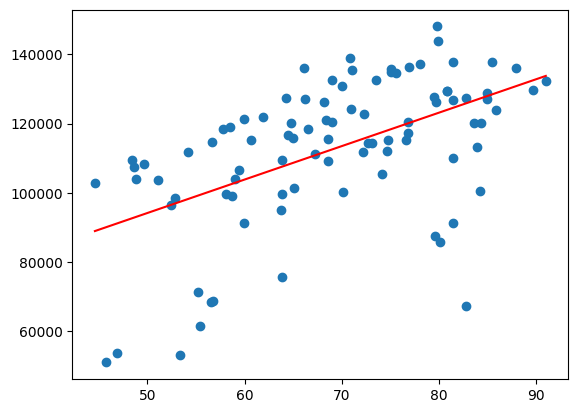

In [65]:
x = data['TEMPERATURE']
y = (data['N_TRIPS'])

plt.scatter(x=data['TEMPERATURE'], y=data['N_TRIPS'])

plt.plot(np.unique(x),
         np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

plt.show()